In [1]:
import warnings
warnings.filterwarnings('ignore')

# Packages

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score, precision_score, precision_recall_curve, f1_score, fbeta_score

# Simulation

In [5]:
X, y = make_classification(n_samples=1000, n_classes=2,
                           random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]
f1_score(y_test, y_pred)

0.8585858585858586

In [6]:
_, _, threshold = precision_recall_curve(y_test, y_pred_prob)

In [7]:
f1score = list()
f05score = list()
f2score = list()
precision = list()
recall = list()

for th in threshold:                                                    
    y_test_pred = list()
    for prob in y_pred_prob:
        if prob > th:
            y_test_pred.append(1)
        else:
            y_test_pred.append(0)
    
    f1score.append(f1_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred))
    recall.append(recall_score(y_test, y_test_pred))
    f05score.append(fbeta_score(y_test, y_test_pred, beta=0.5))
    f2score.append(fbeta_score(y_test, y_test_pred, beta=2))


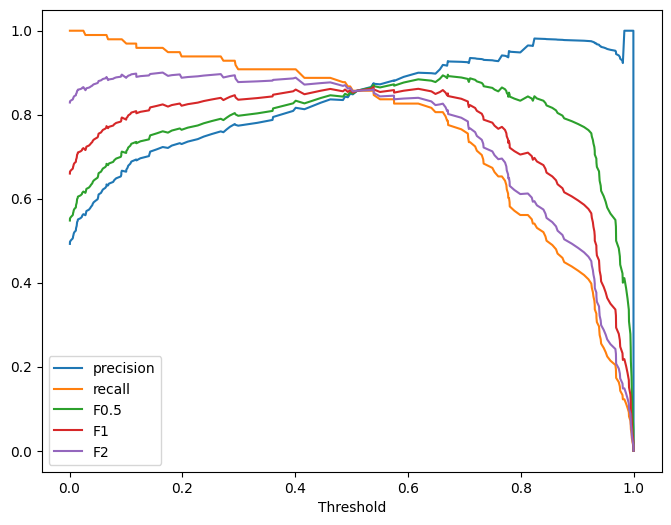

In [9]:
_, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Threshold')
plt.plot(threshold, precision, label='precision')
plt.plot(threshold, recall, label='recall')
plt.plot(threshold, f05score, label='F0.5')
plt.plot(threshold, f1score, label='F1')
plt.plot(threshold, f2score, label='F2')
plt.legend(loc='lower left')

IndexError: index 199 is out of bounds for axis 0 with size 7

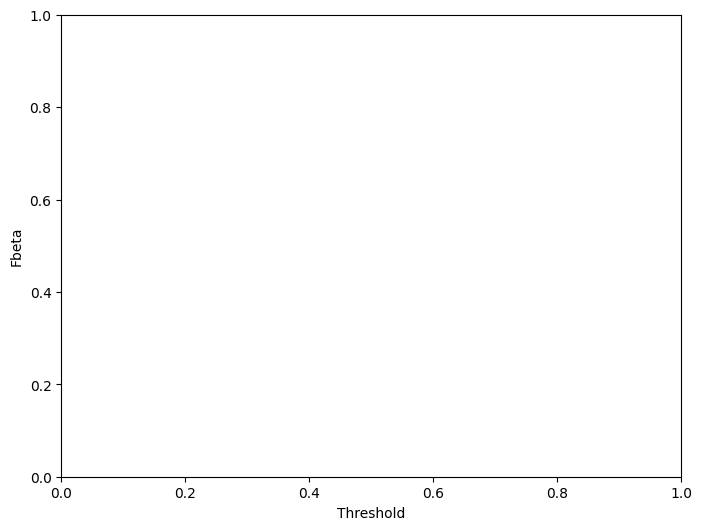

In [18]:
betas = [0.1, 0.3, 0.5, 0.7, 1, 2, 5]
colors = plt.cm.jet(np.array(betas))


_, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Threshold')
ax.set_ylabel('Fbeta')
i=0;
for beta in betas:
    fbetascore = list()
    for i, th in enumerate(threshold):
        y_test_pred = list()
        for prob in y_pred_prob:
            if prob > th:
                y_test_pred.append(1)
            else:
                y_test_pred.append(0)
        fbetascore.append(fbeta_score(y_test, y_test_pred,
                                      beta=beta))
    plt.plot(threshold, fbetascore, label=f'F{beta}', color=colors[i])
    i+=1
plt.legend(loc='lower left')

In [22]:
colors = plt.cm.jet(np.linspace(0,1,5))
colors

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.        , 0.50392157, 1.        , 1.        ],
       [0.49019608, 1.        , 0.47754586, 1.        ],
       [1.        , 0.58169935, 0.        , 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]])